In [1]:
import numpy as np
from os.path import expanduser
from contextlib import closing
from PIL import Image
import cv2
import plyvel
from streetlearn.buff import streetlearn_pb2 as street
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
db_path = expanduser("~/fair/streetlearn/data/pittsburgh_512")
os.makedirs("figures", exist_ok=True)

coords = []
compressed_images = []
with closing(plyvel.DB(db_path, create_if_missing=False)) as db:
    for k, v in tqdm(db):
        if k == b'panos_connectivity':
            pass
        else:
            pano = street.Pano()
            pano.ParseFromString(v)
            coords.append(dict(lat=pano.coords.lat, lng=pano.coords.lng))
            compressed_images.append(pano.compressed_image)
            del pano
coord_df = pd.DataFrame(coords)

58008it [00:08, 6589.45it/s] 


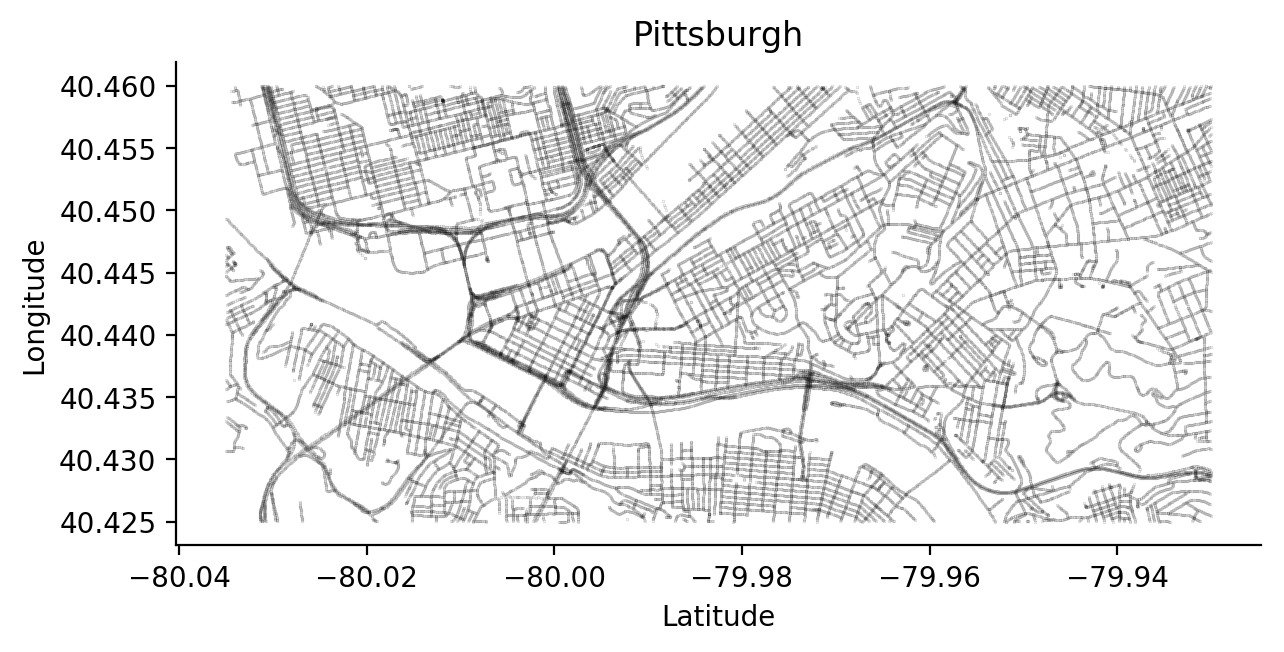

In [17]:
plt.figure(figsize=(7, 3.2), dpi=200)
plt.scatter(coord_df['lng'], coord_df['lat'], s=0.02, color="black", alpha=0.3)
# plt.gca().set_aspect("equal")
plt.title('Pittsburgh')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('figures/pittsburgh_map.png')

https://codeyarns.com/2015/01/23/how-to-specify-opencv-color-type-in-python/

In openCV, the image read pipeline seems to be defined by flags
```c
enum {
    /* 8bit, color or not */
    CV_LOAD_IMAGE_UNCHANGED  =-1,
    /* 8bit, gray */
    CV_LOAD_IMAGE_GRAYSCALE  =0,
    /* ?, color */
    CV_LOAD_IMAGE_COLOR      =1,
    /* any depth, ? */
    CV_LOAD_IMAGE_ANYDEPTH   =2,
    /* ?, any color */
    CV_LOAD_IMAGE_ANYCOLOR   =4
};
```

In [ ]:
def blob2image(image_blob):
    """
    
    :param image_blob: 
    :return: Size(H, W, C) (208, 416, 3)
    """
    img_array = np.frombuffer(image_blob, np.uint8)
    return cv2.imdecode(img_array, 2 | 4)

In [9]:
img = blob2image(compressed_images[1])
Image.fromarray(img).show()

generating the dataset

1. make sure the images are taken during the day (instead of mix b/c day and night)
2. 50% neighbors, 50% non-neighbors

1. verify that the local metric is working
2. show distribution of way points retrieved by the local metric matrix

try to push for over-fit.